# ARC thermo demo

Here we calculate thermodynamic data for several species.

This demo shows different methods to define an ARCSpecies object: (1) from an RMG `Species` object, (2) using xyz (we also give SMILES for the 2D graph bond orders used for BAC), (3) from SMILES, (4) from an RMG `Molecule` object, (5) from an RMG adjacency list.

### imports

In [1]:
import rmgpy
from rmgpy.molecule.molecule import *
from rmgpy.species import Species
from arc.species import ARCSpecies
from IPython.display import display
import arc
import matplotlib.pyplot as plt
%matplotlib notebook

Using Theano backend.


### Below are different methods to define species in ARC

In [2]:
"""
Arguments for ARCSpecies:
------------------------
label (``str``)
is_ts (True/False, default is False)
rmg_species (an RMG `Species` object)
mol (an RMG `Molecule` object)
xyz (an xyz guess)
multiplicity (``int``, trivial value, 1 or 2, automatically determined)
charge (``int``, default: 0)
smiles (SMILES structure)
adjlist (RMG Adjacency List structure)
bond_corrections (BAC dictionary for Arkane)
generate_thermo (True/False, default is True)
yml_path (path to the YAML file)
ts_methods (a list with TS guess methods, default is in settings.py)

Note: A TS ARCSpecies object does not have to be created (unless the user would like to explicitly set arguments),
      it will be automatically created per ARCReaction object if not already defined.
"""

# Method 1: RMG `Species` object (here by SMILES)
spc1 = Species(molecule=[Molecule().fromSMILES("C=C[O]")])  # delocalized radical + amine
spc1.label = 'vinoxy'
print '1.', spc1.label + ':'
display(spc1)

# Method 2: ARCSpecies object by XYZ (also give SMILES for thermo BAC)
oh_xyz = """O       0.00000000    0.00000000   -0.12002167
H       0.00000000    0.00000000    0.85098324"""
spc2 = ARCSpecies(label='OH', xyz=oh_xyz, smiles='[OH]', multiplicity=2, charge=0)
print '\n\n', '2.', spc2.label + ':'
display(spc2.mol)

# Method 3: ARCSpecies object by SMILES
spc3 = ARCSpecies(label='methylamine', smiles='CN', multiplicity=1, charge=0)
print '\n\n', '3.', spc3.label + ':'
display(spc3.mol)

# Method 4: ARCSpecies object by RMG Molecule object
mol4 = Molecule().fromSMILES("C=CC")
spc4 = ARCSpecies(label='propene', mol=mol4, multiplicity=1, charge=0)
print '\n\n', '4.', spc4.label + ':'
display(spc4.mol)

# Method 5: ARCSpecies by AdjacencyList (to generate AdjLists, see https://rmg.mit.edu/molecule_search)
so2_adj = """1 N u0 p1 c0 {2,S} {3,S} {4,S}
2 N u0 p1 c0 {1,S} {5,S} {6,S}
3 H u0 p0 c0 {1,S}
4 H u0 p0 c0 {1,S}
5 H u0 p0 c0 {2,S}
6 H u0 p0 c0 {2,S}"""
spc5 = ARCSpecies(label='N2H4', adjlist=so2_adj, multiplicity=1, charge=0)
print '\n\n', '5.', spc5.label + ':'
display(spc5.mol)

# Last, collect all RMG Species objects and ARCSpecies objects in a list:
arc_species_list = [spc1, spc2, spc3, spc4, spc5]

1. vinoxy:




2. OH:




3. methylamine:




4. propene:




5. N2H4:


### Run ARC:

ARC execution initiated on Wed Feb 13 22:19:22 2019

###############################################################
#                                                             #
#                 Automatic Rate Calculator                   #
#                            ARC                              #
#                                                             #
#   Version: 0.1                                              #
#                                                             #
###############################################################

Starting project ArcDemo

Using the following user input: {'molpro': 'rmg', u'ssh': True, 'qchem': 'pharos', 'gaussian': 'c3ddb'}

Using default level b3lyp/6-311+g(d,p) for refined conformer searches (after filtering via force fields)
Using default level b3lyp/6-311+g(d,p) for TS guesses comparison of different methods
Using default level wb97xd/6-311++g(d,p) for geometry optimizations
Using default level wb97xd/6-311++g(d,p) for

Considering species: methylamine


Considering species: propene


Considering species: N2H4


Considering species: vinoxy




Running job opt_a16215 for OH

Found 1 rotor for methylamine
Pivot list(s) for methylamine: [[1, 2]]


Found 1 rotor for propene
Pivot list(s) for propene: [[1, 2]]


Found 1 rotor for N2H4
Pivot list(s) for N2H4: [[1, 2]]


Found 1 rotor for vinoxy
Pivot list(s) for vinoxy: [[2, 3]]

Running job conformer_a16216 for methylamine
Running job conformer_a16217 for methylamine
Running job conformer_a16218 for propene
Running job conformer_a16219 for propene
Running job conformer_a16220 for N2H4
Running job conformer_a16221 for N2H4
Running job conformer_a16222 for vinoxy
Running job conformer_a16223 for vinoxy
Running job conformer_a16224 for vinoxy
Running job conformer_a16225 for vinoxy
  Ending job opt_a16215 for OH (0:00:53)
Running job opt_a16226 for OH (fine opt)
  Ending job opt_a16226 for OH (0:00:36)

Optimized geometry for OH at wb97xd/6-311++g(d,p):
O       0.00000000    0.00000000   -0.12002200
H       0.00000000    0.00000000    0.85098300



You appear to be running in JupyterLab. You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Running job freq_a16227 for OH
Running job sp_a16228 for OH
  Ending job conformer_a16224 for vinoxy (0:01:27)
  Ending job freq_a16227 for OH (0:00:16)
[Gaussian /home/alongd/Code/ARC/Projects/ArcDemo/calcs/Species/OH/freq_a16227/output.out Warning: ] Number of basis functions (nbasis) has changed from 29 to 30
  Ending job conformer_a16217 for methylamine (0:02:30)
  Ending job conformer_a16222 for vinoxy (0:02:27)
  Ending job sp_a16228 for OH (0:01:11)
Species OH has a T1 diagnostic parameter of 0.00776346

All jobs for species OH successfully converged. Elapsed time: 00:02:47
  Ending job conformer_a16225 for vinoxy (0:02:34)
  Ending job conformer_a16218 for propene (0:02:52)
  Ending job conformer_a16219 for propene (0:02:59)

Conformer jobs for propene successfully terminated.

Running job opt_a16229 for propene
  Ending job conformer_a16220 for N2H4 (0:03:46)
  Ending job conformer_a16221 for N2H4 (0:03:53)

Conformer jobs for N2H4 successfully terminated.

Running job opt_a16

You appear to be running in JupyterLab. You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Running job freq_a16234 for propene
Running job sp_a16235 for propene
Running job scan_a16236 for propene (pivots: [1, 2])
  Ending job opt_a16230 for N2H4 (0:02:05)
Running job opt_a16237 for N2H4 (fine opt)
  Ending job opt_a16232 for vinoxy (0:01:11)
Running job opt_a16238 for vinoxy (fine opt)
  Ending job opt_a16237 for N2H4 (0:00:49)

Optimized geometry for N2H4 at wb97xd/6-311++g(d,p):
N       1.23604000    0.04155100    0.07650000
N       0.69932000    1.25637500    0.58206900
H       1.97147900   -0.26549000    0.69848600
H       0.54272100   -0.69525300    0.00129500
H       0.38717500    1.81676300   -0.19930400
H      -0.08201600    1.11058100    1.21253500



You appear to be running in JupyterLab. You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Running job freq_a16239 for N2H4
Running job sp_a16240 for N2H4
Running job scan_a16241 for N2H4 (pivots: [1, 2])
  Ending job freq_a16234 for propene (0:02:02)
[Gaussian /home/alongd/Code/ARC/Projects/ArcDemo/calcs/Species/propene/freq_a16234/output.out Warning: ] Number of basis functions (nbasis) has changed from 108 to 111
  Ending job freq_a16239 for N2H4 (0:00:25)
[Gaussian /home/alongd/Code/ARC/Projects/ArcDemo/calcs/Species/N2H4/freq_a16239/output.out Warning: ] Number of basis functions (nbasis) has changed from 72 to 74
  Ending job opt_a16238 for vinoxy (0:02:35)

Optimized geometry for vinoxy at wb97xd/6-311++g(d,p):
O       1.11144700    0.28926800    0.03234900
C       2.93017900   -0.12170700   -1.36740600
C       2.28386200   -0.04863900   -0.10016700
H       3.96791500   -0.42419500   -1.44885700
H       2.37328700    0.12965300   -2.26283700
H       2.88708300   -0.31307400    0.78708600



You appear to be running in JupyterLab. You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Running job freq_a16242 for vinoxy
Running job sp_a16243 for vinoxy
Running job scan_a16244 for vinoxy (pivots: [2, 3])
  Ending job opt_a16233 for methylamine (0:04:31)
Running job opt_a16245 for methylamine (fine opt)
  Ending job freq_a16242 for vinoxy (0:00:57)
[Gaussian /home/alongd/Code/ARC/Projects/ArcDemo/calcs/Species/vinoxy/freq_a16242/output.out Warning: ] Number of basis functions (nbasis) has changed from 87 to 90
  Ending job opt_a16245 for methylamine (0:00:48)

Optimized geometry for methylamine at wb97xd/6-311++g(d,p):
N       0.81971700    0.19811500   -0.33547100
C      -0.57108200   -0.02334600    0.04436600
H      -1.08215000   -0.56239900   -0.75677600
H      -0.71473600   -0.58757700    0.97746700
H      -1.07287600    0.94093900    0.15369500
H       1.30626300   -0.68002200   -0.46386100
H       1.31486400    0.71429000    0.38057900



You appear to be running in JupyterLab. You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Running job freq_a16246 for methylamine
Running job sp_a16247 for methylamine
Running job scan_a16248 for methylamine (pivots: [1, 2])
  Ending job freq_a16246 for methylamine (0:00:53)
[Gaussian /home/alongd/Code/ARC/Projects/ArcDemo/calcs/Species/methylamine/freq_a16246/output.out Warning: ] Number of basis functions (nbasis) has changed from 79 to 81
  Ending job sp_a16240 for N2H4 (0:05:11)
Species N2H4 has a T1 diagnostic parameter of 0.00877171
  Ending job sp_a16247 for methylamine (0:08:01)
Species methylamine has a T1 diagnostic parameter of 0.00867672
  Ending job sp_a16235 for propene (0:19:03)
Species propene has a T1 diagnostic parameter of 0.01078033
  Ending job sp_a16243 for vinoxy (0:18:46)
Species vinoxy has a T1 diagnostic parameter of 0.02298004. Looks like it requires multireference treatment, I wouldn't trust it's calculated energy!
  Ending job scan_a16241 for N2H4 (0:42:18)
*INVALIDATED* Rotor scan between pivots [1, 2] for N2H4 is:


<IPython.core.display.Javascript object>


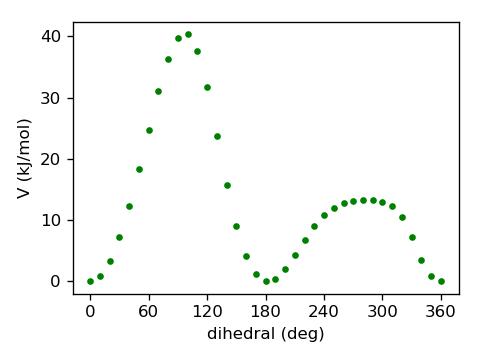


All jobs for species N2H4 successfully converged. Elapsed time: 00:49:20
  Ending job scan_a16236 for propene (0:45:26)
Determined a symmetry number of 3 for rotor of species propene between pivots [1, 2] based on the number of peaks and valleys, all within the determined resolution criteria.
Rotor scan between pivots [1, 2] for propene (with symmetry 3) is:


<IPython.core.display.Javascript object>


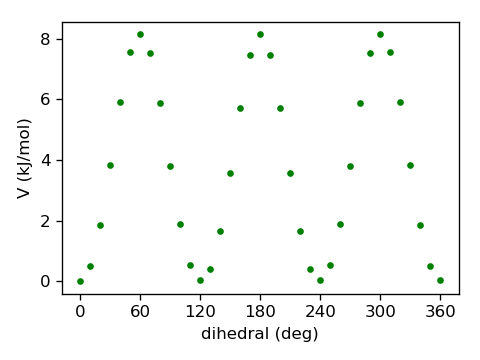


All jobs for species propene successfully converged. Elapsed time: 00:50:45
Currently running jobs:
{'methylamine': [u'scan_a16248'], 'vinoxy': [u'scan_a16244']}
  Ending job scan_a16244 for vinoxy (1:15:22)
*INVALIDATED* Rotor scan between pivots [2, 3] for vinoxy is:


<IPython.core.display.Javascript object>


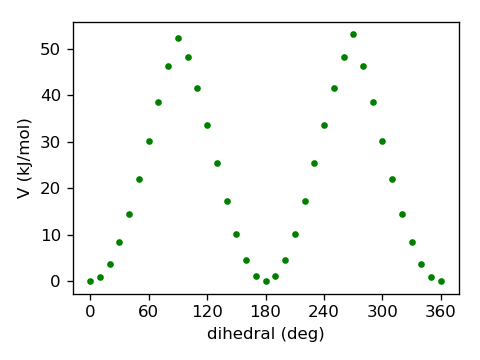


All jobs for species vinoxy successfully converged. Elapsed time: 01:24:11
Currently running jobs:
{'methylamine': [u'scan_a16248']}
Currently running jobs:
{'methylamine': [u'scan_a16248']}
  Ending job scan_a16248 for methylamine (3:01:14)
Determined a symmetry number of 3 for rotor of species methylamine between pivots [1, 2] based on the number of peaks and valleys, all within the determined resolution criteria.
Rotor scan between pivots [1, 2] for methylamine (with symmetry 3) is:


<IPython.core.display.Javascript object>


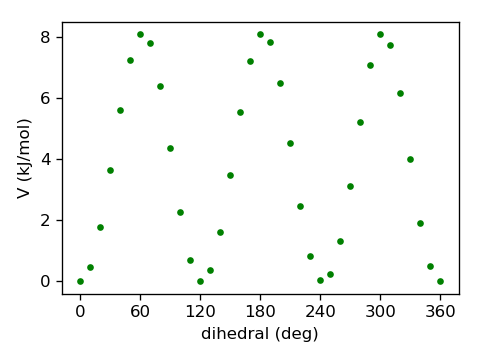


All jobs for species methylamine successfully converged. Elapsed time: 03:11:53


Loading the RMG database...
Loading thermodynamics library from BurkeH2O2.py in /home/alongd/Code/RMG-database/input/thermo/libraries...
Loading thermodynamics library from thermo_DFT_CCSDTF12_BAC.py in /home/alongd/Code/RMG-database/input/thermo/libraries...
Loading thermodynamics library from DFT_QCI_thermo.py in /home/alongd/Code/RMG-database/input/thermo/libraries...
Loading thermodynamics library from Klippenstein_Glarborg2016.py in /home/alongd/Code/RMG-database/input/thermo/libraries...
Loading thermodynamics library from primaryThermoLibrary.py in /home/alongd/Code/RMG-database/input/thermo/libraries...
Loading thermodynamics library from primaryNS.py in /home/alongd/Code/RMG-database/input/thermo/libraries...
Loading thermodynamics library from NitrogenCurran.py in /home/alongd/Code/RMG-database/input/thermo/libraries...
Loading thermodynamics library from NOx2018.py in /home/alongd/Code/RMG-dat



Symmetry input file written to /home/alongd/Code/ARC/scratch/0.symm
Point group: Cs
Determined a symmetry number of 3 for rotor of species propene between pivots [1, 2] based on the number of peaks and valleys, all within the determined resolution criteria.
Using the following BAC for propene: {'C-C': 1, 'C=C': 1, 'C-H': 6}
Loading species propene...
Assigned a frequency scale factor of 0.984 for model chemistry ccsd(t)-f12/cc-pvtz-f12
Loading statistical mechanics parameters for propene...
Saving statistical mechanics parameters for propene...
Saving thermo for propene...



Thermodynamics for propene:
  Enthalpy of formation (298 K)   =     5.802 kcal/mol
  Entropy of formation (298 K)    =    63.640 cal/(mol*K)
   =========== =========== =========== =========== ===========
   Temperature Heat cap.   Enthalpy    Entropy     Free energy
   (K)         (cal/mol*K) (kcal/mol)  (cal/mol*K) (kcal/mol)
   =========== =========== =========== =========== ===========
           300      15.

<IPython.core.display.Javascript object>


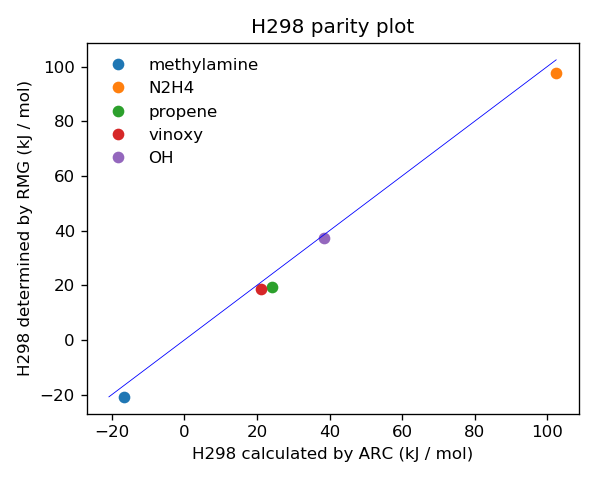

<IPython.core.display.Javascript object>


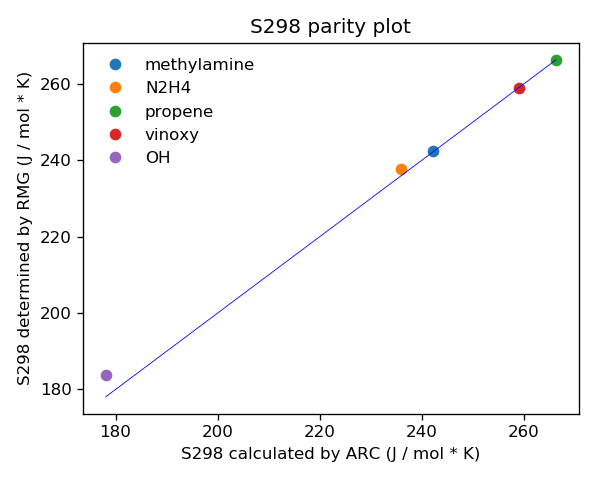


Sources of thermoproperties determined by RMG for the parity plots:
   methylamine: Thermo library: thermo_DFT_CCSDTF12_BAC
   N2H4:        Thermo library: thermo_DFT_CCSDTF12_BAC
   propene:     Thermo library: DFT_QCI_thermo
   vinoxy:      Thermo library: DFT_QCI_thermo
   OH:          Thermo library: BurkeH2O2




All jobs terminated. Summary for project ArcDemo:

Species methylamine converged successfully
Species N2H4 converged successfully
Species propene converged successfully
Species vinoxy converged successfully
Species OH converged successfully

Total execution time: 03:12:44
ARC execution terminated on Thu Feb 14 01:32:07 2019


In [3]:
"""
Arguments for ARC:
-----------------
project (``str``, the project name. Should be a valid name for a folder)
arc_species_list (A list of ARCSpecies and RMF `Species` objects)
arc_rxn_list (A list of ARCReacrion and RMF `Reaction` objects)
level_of_theory (e.g., `CCSD(T)-F12a/aug-cc-pVTZ//B3LYP/6-311++G(3df,3pd)` or `CBS-QB3`...)
conformer_level
composite_method (either pass the composite method here, or in `level_of_theory`)
opt_level
freq_level (set to `opt_level` if not specified)
sp_level
scan_level
ts_guess_level
fine (True/False, default is True)
generate_conformers (True/False, default is True)
scan_rotors (True/False, default is True)
use_bac (True/False for using bond additivity corrections, default is True)
model_chemistry (should be a valid Arkane "model chemistry")
ess_settings (a software:server dictionary, overrides ARC's servers scanner)
initial_trsh (an initial troubleshooting method for jobs)
t_min (float, minimal T for kineics computations, default: 300)
t_max (float, maximal T for kineics computations, default: 3000)
t_count (int The number of temperature points between t_min and t_max for kinetics computations)
verbose (logging verbosity)
project_directory (A path to the project directory, defaults to ARC/Projects/<project name>)
"""

ess_settings = {'gaussian': 'c3ddb', 'molpro': 'rmg', 'qchem': 'pharos'}
arc0 = arc.ARC(project='ArcDemo', arc_species_list=arc_species_list, ess_settings=ess_settings)
arc0.execute()